In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.datasets import boston_housing
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("Boston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,NaN,NaN
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,NaN,NaN
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,NaN,NaN
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,NaN,NaN


In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

<Axes: >

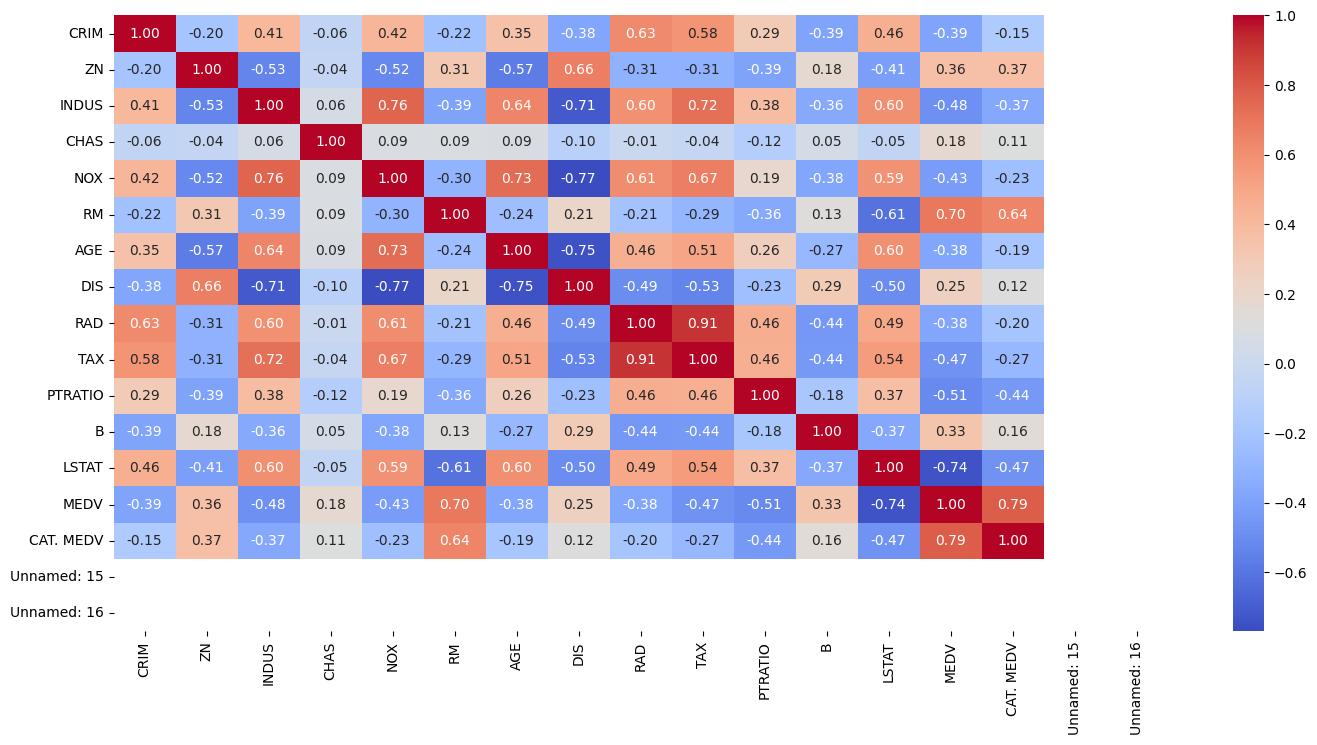

In [37]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')


In [38]:
x = df[['RM','PTRATIO','LSTAT']]
y = df['MEDV']
x.shape, y.shape

((506, 3), (506,))

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=25 )

In [44]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [89]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

In [90]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                256       
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 8)                 136       
                                                                 
 dense_28 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
history = model.fit(x_train, y_train, epochs=100, batch_size=16,
                    validation_split=0.2, verbose=0)

In [92]:
mse,mae= model.evaluate(x_test,y_test)
mse,mae

5/5 [==============================] - 0s 1ms/step - loss: 16.0832 - mae: 2.6028


(16.083242416381836, 2.6027588844299316)

In [93]:
y_pred = model.predict(x_test)

5/5 [==============================] - 0s 746us/step


In [94]:
rmse=root_mean_squared_error(y_test,y_pred)
rmse

4.010391894350863

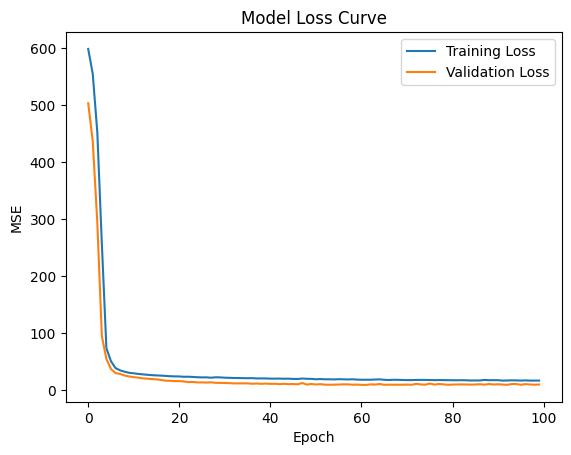

In [100]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Model Loss Curve')
plt.legend()
plt.show()

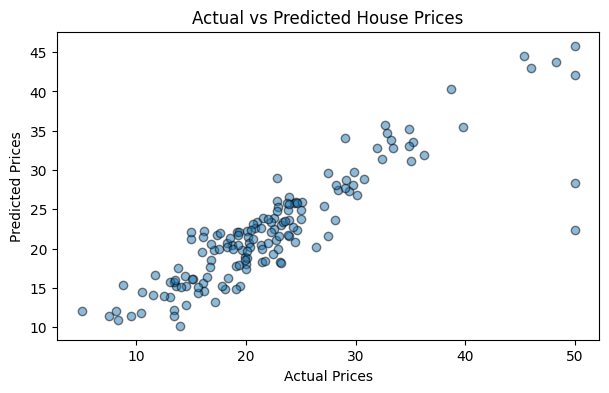

In [99]:
plt.figure(figsize=(7,4))
plt.scatter(y_test, y_pred,alpha=0.5,edgecolors='k')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()